In [1]:
import matplotlib.pyplot as plt

import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
import time
from ray import tune
from ray.tune.schedulers import ASHAScheduler
from torch import nn
from ray.tune import CLIReporter
import wandb



In [2]:
params = [
    [[1, 4], [3, 6]], # real feature
    [[10, 12], [20, 22]] # confounder
]

# De-correlated confounders in target- and test-data

In [3]:
search_space = {
    "model":None,
    "device":"cuda",
    "loss_fn":nn.CrossEntropyLoss(),
    "epochs":500,
    "batch_size": tune.choice([32,64,128,256]),
    "optimizer":torch.optim.Adam,

    "alpha":tune.uniform(0,1),
    "lr": tune.loguniform(1e-5,1e-1),
    "weight_decay": tune.loguniform(1e-5,1e-1),
    "wandb": {
        "api_key": "10dd47062950e00af63d29317ead0331316732ff",
        "entity": "confounder_in_ml",
        "project": "Hyperparameters",
    },
}
max_t = 500
samples = 30
target_domain_samples = 16


In [4]:
def plot_analysis(analysis):
    dfs = analysis.trial_dataframes
    ax = None  # This plots everything on the same plot
    for d in dfs.values():
        ax = d.mean_accuracy.plot(ax=ax, legend=False)

# BrNet

In [5]:
c = CI.confounder()
model = Models.Br_Net()
search_space["model"] = model
search_space["wandb"]["group"] = "BrNet"

c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

2022-07-15 12:29:17,134	INFO registry.py:91 -- Detected unknown callable for trainable. Converting to class.
2022-07-15 12:29:17,136	WARNING function_runner.py:603 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.
2022-07-15 12:29:19,429	WARNING worker.py:1404 -- Warning: The actor ImplicitFunc is very large (16 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
(ImplicitFunc pid=4049598) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


== Status ==
Current time: 2022-07-15 12:29:25 (running for 00:00:08.59)
Memory usage on this node: 17.1/30.5 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 4.000: None | Iter 1.000: None
Resources requested: 1.0/16 CPUs, 0/0 GPUs, 0.0/10.18 GiB heap, 0.0/5.09 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_12-29-17
Number of trials: 17/20 (16 PENDING, 1 RUNNING)
+------------------------+----------+------------------------+----------+--------------+-----------+----------------+
| Trial name             | status   | loc                    |    alpha |   batch_size |        lr |   weight_decay |
|------------------------+----------+------------------------+----------+--------------+-----------+----------------|
| train_tune_faf00_00000 | RUNNING  | 192.168.178.26:4049598 | 0.281227 |          128 | 0.0441387 |     0.00277457 |
| train_tune_faf00_00001 | PENDING  |                        | 0.451867 |          256 | 0.0012546 |     2.1175e-05 |
+-----------

(ImplicitFunc pid=4049598) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4049598) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-17/train_tune_faf00_00000_0_alpha=0.2812,batch_size=128,lr=0.0441,weight_decay=0.0028_2022-07-15_12-29-19/wandb/run-20220715_122922-faf00_00000
(ImplicitFunc pid=4049598) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4049598) wandb: Syncing run train_tune_faf00_00000
(ImplicitFunc pid=4049598) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4049598) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/faf00_00000


Result for train_tune_faf00_00000:
  date: 2022-07-15_12-29-26
  done: false
  experiment_id: 8e9598293bb049db99f2d2c61b57f180
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049598
  time_since_restore: 0.1563708782196045
  time_this_iter_s: 0.1563708782196045
  time_total_s: 0.1563708782196045
  timestamp: 1657880966
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: faf00_00000
  warmup_time: 3.6599907875061035
  
Result for train_tune_faf00_00000:
  date: 2022-07-15_12-29-30
  done: true
  experiment_id: 8e9598293bb049db99f2d2c61b57f180
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4049598
  time_since_restore: 4.9377734661102295
  time_this_iter_s: 0.3168163299560547
  time_total_s: 4.9377734661102295
  timestamp: 1657880970
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: faf00_00000
  warmup_time: 3.6599907875061035
  
Result fo

(ImplicitFunc pid=4049702) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


Result for train_tune_faf00_00016:
  date: 2022-07-15_12-29-34
  done: true
  experiment_id: 8e9598293bb049db99f2d2c61b57f180
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049598
  time_since_restore: 3.7384767532348633
  time_this_iter_s: 0.3419206142425537
  time_total_s: 3.7384767532348633
  timestamp: 1657880974
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: faf00_00016
  warmup_time: 3.6599907875061035
  


(ImplicitFunc pid=4049703) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4049705) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


Result for train_tune_faf00_00017:
  date: 2022-07-15_12-29-35
  done: true
  experiment_id: 8e9598293bb049db99f2d2c61b57f180
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4049598
  time_since_restore: 0.30104708671569824
  time_this_iter_s: 0.30104708671569824
  time_total_s: 0.30104708671569824
  timestamp: 1657880975
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: faf00_00017
  warmup_time: 3.6599907875061035
  


(ImplicitFunc pid=4049708) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4049712) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4049709) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


Result for train_tune_faf00_00018:
  date: 2022-07-15_12-29-35
  done: false
  experiment_id: 8e9598293bb049db99f2d2c61b57f180
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049598
  time_since_restore: 0.22505950927734375
  time_this_iter_s: 0.22505950927734375
  time_total_s: 0.22505950927734375
  timestamp: 1657880975
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: faf00_00018
  warmup_time: 3.6599907875061035
  


(ImplicitFunc pid=4049713) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4049718) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4049727) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4049730) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4049716) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4049750) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4049744) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4049761) wandb: Currently logg

Result for train_tune_faf00_00018:
  date: 2022-07-15_12-29-36
  done: true
  experiment_id: 8e9598293bb049db99f2d2c61b57f180
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049598
  time_since_restore: 1.9192595481872559
  time_this_iter_s: 0.20422124862670898
  time_total_s: 1.9192595481872559
  timestamp: 1657880976
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: faf00_00018
  warmup_time: 3.6599907875061035
  
Result for train_tune_faf00_00019:
  date: 2022-07-15_12-29-37
  done: true
  experiment_id: 8e9598293bb049db99f2d2c61b57f180
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4049598
  time_since_restore: 0.39684605598449707
  time_this_iter_s: 0.39684605598449707
  time_total_s: 0.39684605598449707
  timestamp: 1657880977
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: faf00_00019
  warmup_time: 3.6599907875061035
  


(ImplicitFunc pid=4049702) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4049702) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-17/train_tune_faf00_00001_1_alpha=0.4519,batch_size=256,lr=0.0013,weight_decay=0.0000_2022-07-15_12-29-26/wandb/run-20220715_122933-faf00_00001
(ImplicitFunc pid=4049702) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4049702) wandb: Syncing run train_tune_faf00_00001
(ImplicitFunc pid=4049702) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4049702) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/faf00_00001


Result for train_tune_faf00_00001:
  date: 2022-07-15_12-29-39
  done: false
  experiment_id: 89a55dcc009742549a1b5e65b12985b7
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049702
  time_since_restore: 0.37390875816345215
  time_this_iter_s: 0.37390875816345215
  time_total_s: 0.37390875816345215
  timestamp: 1657880979
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: faf00_00001
  warmup_time: 5.8323974609375
  


(ImplicitFunc pid=4049705) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4049705) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-17/train_tune_faf00_00003_3_alpha=0.6351,batch_size=256,lr=0.0001,weight_decay=0.0040_2022-07-15_12-29-26/wandb/run-20220715_122934-faf00_00003
(ImplicitFunc pid=4049705) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4049705) wandb: Syncing run train_tune_faf00_00003
(ImplicitFunc pid=4049705) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4049705) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/faf00_00003
(ImplicitFunc pid=4049703) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4049703) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-17/train_tune_faf00_00002_2_alpha=0.8288,batch_size=256,lr=0.0454,weight_decay=0.0020_2022-07-15_12-29-26/wandb/run-

Result for train_tune_faf00_00003:
  date: 2022-07-15_12-29-41
  done: false
  experiment_id: 128a89eaa31442b491c0a528ebf31133
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049705
  time_since_restore: 0.44098377227783203
  time_this_iter_s: 0.44098377227783203
  time_total_s: 0.44098377227783203
  timestamp: 1657880981
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: faf00_00003
  warmup_time: 6.8373703956604
  
Result for train_tune_faf00_00002:
  date: 2022-07-15_12-29-41
  done: false
  experiment_id: bebda4da410c42d9bb0530366f077e4b
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049703
  time_since_restore: 0.6247551441192627
  time_this_iter_s: 0.6247551441192627
  time_total_s: 0.6247551441192627
  timestamp: 1657880981
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: faf00_00002
  warmup_time: 6.985517740249634
  


(ImplicitFunc pid=4049708) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4049708) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-17/train_tune_faf00_00004_4_alpha=0.5425,batch_size=32,lr=0.0000,weight_decay=0.0261_2022-07-15_12-29-26/wandb/run-20220715_122935-faf00_00004
(ImplicitFunc pid=4049708) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4049708) wandb: Syncing run train_tune_faf00_00004
(ImplicitFunc pid=4049708) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4049708) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/faf00_00004
(ImplicitFunc pid=4049712) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4049712) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-17/train_tune_faf00_00006_6_alpha=0.9238,batch_size=128,lr=0.0001,weight_decay=0.0032_2022-07-15_12-29-26/wandb/run-2

Result for train_tune_faf00_00005:
  date: 2022-07-15_12-29-42
  done: true
  experiment_id: 817700b0edd64776a8a8cb187bc25b99
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4049709
  time_since_restore: 0.5599052906036377
  time_this_iter_s: 0.5599052906036377
  time_total_s: 0.5599052906036377
  timestamp: 1657880982
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: faf00_00005
  warmup_time: 7.396090507507324
  
Result for train_tune_faf00_00007:
  date: 2022-07-15_12-29-42
  done: false
  experiment_id: 93310569f9df485a895d43c882a685b2
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049713
  time_since_restore: 0.48940229415893555
  time_this_iter_s: 0.48940229415893555
  time_total_s: 0.48940229415893555
  timestamp: 1657880982
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: faf00_00007
  warmup_time: 7.42980170249939
  
Result for 

(ImplicitFunc pid=4049730) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4049730) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-17/train_tune_faf00_00011_11_alpha=0.8131,batch_size=256,lr=0.0008,weight_decay=0.0101_2022-07-15_12-29-27/wandb/run-20220715_122936-faf00_00011
(ImplicitFunc pid=4049730) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4049730) wandb: Syncing run train_tune_faf00_00011
(ImplicitFunc pid=4049730) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4049730) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/faf00_00011
(ImplicitFunc pid=4049750) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4049750) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-17/train_tune_faf00_00013_13_alpha=0.3853,batch_size=32,lr=0.0005,weight_decay=0.0003_2022-07-15_12-29-27/wandb/run

Result for train_tune_faf00_00009:
  date: 2022-07-15_12-29-42
  done: false
  experiment_id: e16ee8d9e30a420da41573164839eb0c
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049718
  time_since_restore: 0.646925687789917
  time_this_iter_s: 0.646925687789917
  time_total_s: 0.646925687789917
  timestamp: 1657880982
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: faf00_00009
  warmup_time: 7.371485710144043
  
Result for train_tune_faf00_00003:
  date: 2022-07-15_12-29-42
  done: true
  experiment_id: 128a89eaa31442b491c0a528ebf31133
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049705
  time_since_restore: 1.8686904907226562
  time_this_iter_s: 0.4209012985229492
  time_total_s: 1.8686904907226562
  timestamp: 1657880982
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: faf00_00003
  warmup_time: 6.8373703956604
  
Result for train_tune_faf0

(ImplicitFunc pid=4049716) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4049716) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-17/train_tune_faf00_00008_8_alpha=0.5512,batch_size=128,lr=0.0001,weight_decay=0.0001_2022-07-15_12-29-26/wandb/run-20220715_122936-faf00_00008
(ImplicitFunc pid=4049716) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4049716) wandb: Syncing run train_tune_faf00_00008
(ImplicitFunc pid=4049716) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4049716) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/faf00_00008
(ImplicitFunc pid=4049761) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4049761) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-17/train_tune_faf00_00014_14_alpha=0.5487,batch_size=32,lr=0.0002,weight_decay=0.0030_2022-07-15_12-29-27/wandb/run-

Result for train_tune_faf00_00001:
  date: 2022-07-15_12-29-43
  done: true
  experiment_id: 89a55dcc009742549a1b5e65b12985b7
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4049702
  time_since_restore: 4.205843687057495
  time_this_iter_s: 0.49890923500061035
  time_total_s: 4.205843687057495
  timestamp: 1657880983
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: faf00_00001
  warmup_time: 5.8323974609375
  
Result for train_tune_faf00_00011:
  date: 2022-07-15_12-29-43
  done: false
  experiment_id: 13483fe8e09f41ee9a72cd0a12e00365
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049730
  time_since_restore: 0.6138937473297119
  time_this_iter_s: 0.6138937473297119
  time_total_s: 0.6138937473297119
  timestamp: 1657880983
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: faf00_00011
  warmup_time: 7.670425176620483
  
Result for tra

(ImplicitFunc pid=4049764) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4049764) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-17/train_tune_faf00_00015_15_alpha=0.5141,batch_size=128,lr=0.0004,weight_decay=0.0000_2022-07-15_12-29-27/wandb/run-20220715_122936-faf00_00015
(ImplicitFunc pid=4049764) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4049764) wandb: Syncing run train_tune_faf00_00015
(ImplicitFunc pid=4049764) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4049764) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/faf00_00015


Result for train_tune_faf00_00012:
  date: 2022-07-15_12-29-44
  done: false
  experiment_id: 24b4bfe402aa4b9c85c722e1b5fc947c
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049744
  time_since_restore: 0.8455917835235596
  time_this_iter_s: 0.8455917835235596
  time_total_s: 0.8455917835235596
  timestamp: 1657880984
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: faf00_00012
  warmup_time: 7.818731307983398
  
Result for train_tune_faf00_00014:
  date: 2022-07-15_12-29-44
  done: false
  experiment_id: 5d9c08f8f9c04230b4a0ce29ae4fb538
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049761
  time_since_restore: 0.8318972587585449
  time_this_iter_s: 0.8318972587585449
  time_total_s: 0.8318972587585449
  timestamp: 1657880984
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: faf00_00014
  warmup_time: 7.798904895782471
  
Result for train_tun

(train_tune pid=4049705) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4049705) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4049709) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4049705) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4049705) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)


Result for train_tune_faf00_00010:
  date: 2022-07-15_12-29-45
  done: true
  experiment_id: 77e6f71980b94d6ebae55c534178fd52
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4049727
  time_since_restore: 2.957526922225952
  time_this_iter_s: 0.60406494140625
  time_total_s: 2.957526922225952
  timestamp: 1657880985
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: faf00_00010
  warmup_time: 7.610090732574463
  


(train_tune pid=4049703) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4049705) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4049702) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4049705) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049702) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4049705) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049705) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049705) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4049705) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_faf00_00013:
  date: 2022-07-15_12-29-46
  done: true
  experiment_id: 8aa66bf09cc24ec58684593ac75b6ef9
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4049750
  time_since_restore: 3.263948917388916
  time_this_iter_s: 0.5626194477081299
  time_total_s: 3.263948917388916
  timestamp: 1657880986
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: faf00_00013
  warmup_time: 7.741333484649658
  


(train_tune pid=4049702) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4049705) wandb: \ 0.005 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049705) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: | 0.001 MB of 0.012 MB uploaded (0.000 MB deduped)
(train_tune pid=4049705) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: / 0.001 MB of 0.012 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: | 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4049705) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: - 0.001 MB of 0.012 MB uploaded (0.000 MB deduped)
(train_tune pid=4049713) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4049713) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_

Result for train_tune_faf00_00011:
  date: 2022-07-15_12-29-46
  done: true
  experiment_id: 13483fe8e09f41ee9a72cd0a12e00365
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5009765625
  node_ip: 192.168.178.26
  pid: 4049730
  time_since_restore: 4.06776762008667
  time_this_iter_s: 0.22944355010986328
  time_total_s: 4.06776762008667
  timestamp: 1657880986
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: faf00_00011
  warmup_time: 7.670425176620483
  
Result for train_tune_faf00_00006:
  date: 2022-07-15_12-29-47
  done: true
  experiment_id: 3c52575568654587aeb2bdbde3b9ff31
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049712
  time_since_restore: 4.968240976333618
  time_this_iter_s: 0.2725231647491455
  time_total_s: 4.968240976333618
  timestamp: 1657880987
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: faf00_00006
  warmup_time: 7.543487310409546
  


(train_tune pid=4049702) wandb: | 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: / 0.001 MB of 0.012 MB uploaded (0.000 MB deduped)
(train_tune pid=4049702) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: - 0.001 MB of 0.012 MB uploaded (0.000 MB deduped)
(train_tune pid=4049702) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: \ 0.001 MB of 0.012 MB uploaded (0.000 MB deduped)
(train_tune pid=4049713) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049702) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(tra

Result for train_tune_faf00_00008:
  date: 2022-07-15_12-29-47
  done: true
  experiment_id: 72e1bd1734fc412fb2aa9eab0e7388dc
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049716
  time_since_restore: 4.178413152694702
  time_this_iter_s: 0.22796320915222168
  time_total_s: 4.178413152694702
  timestamp: 1657880987
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: faf00_00008
  warmup_time: 7.8771843910217285
  


(train_tune pid=4049702) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: / 0.003 MB of 0.012 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: - 0.012 MB of 0.012 MB uploaded (0.000 MB deduped)
(train_tune pid=4049702) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: / 0.010 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: \ 0.012 MB of 0.012 MB uploaded (0.000 MB deduped)
(train_tune pid=4049713) wandb: | 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)


Result for train_tune_faf00_00015:
  date: 2022-07-15_12-29-47
  done: true
  experiment_id: 6d80643afd6245adbceb165add7324d3
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4049764
  time_since_restore: 3.825047492980957
  time_this_iter_s: 0.1843400001525879
  time_total_s: 3.825047492980957
  timestamp: 1657880987
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: faf00_00015
  warmup_time: 7.9865076541900635
  
Result for train_tune_faf00_00004:
  date: 2022-07-15_12-29-47
  done: true
  experiment_id: 869b7d257e764f2d94928ab6139a7a9b
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049708
  time_since_restore: 5.787832975387573
  time_this_iter_s: 0.23072552680969238
  time_total_s: 5.787832975387573
  timestamp: 1657880987
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: faf00_00004
  warmup_time: 7.24651026725769
  


(train_tune pid=4049702) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049705) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: | 0.012 MB of 0.012 MB uploaded (0.000 MB deduped)
(train_tune pid=4049713) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049702) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: / 0.012 MB of 0.012 MB uploaded (0.000 MB deduped)
(train_tune pid=4049713) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049702) wandb: | 0.010 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: - 0.012 MB of 0.012 MB uploaded (0.000 MB deduped)
(tra

Result for train_tune_faf00_00012:
  date: 2022-07-15_12-29-47
  done: true
  experiment_id: 24b4bfe402aa4b9c85c722e1b5fc947c
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4049744
  time_since_restore: 4.608006477355957
  time_this_iter_s: 0.19829368591308594
  time_total_s: 4.608006477355957
  timestamp: 1657880987
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: faf00_00012
  warmup_time: 7.818731307983398
  
Result for train_tune_faf00_00014:
  date: 2022-07-15_12-29-47
  done: true
  experiment_id: 5d9c08f8f9c04230b4a0ce29ae4fb538
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4049761
  time_since_restore: 4.69165563583374
  time_this_iter_s: 0.19810175895690918
  time_total_s: 4.69165563583374
  timestamp: 1657880987
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: faf00_00014
  warmup_time: 7.798904895782471
  


(train_tune pid=4049702) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049713) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049702) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049713) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049727) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4049727) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4049702) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


== Status ==
Current time: 2022-07-15 12:29:47 (running for 00:00:30.62)
Memory usage on this node: 21.2/30.5 GiB
Using AsyncHyperBand: num_stopped=20
Bracket: Iter 4.000: 0.5 | Iter 1.000: 0.5
Resources requested: 0/16 CPUs, 0/0 GPUs, 0.0/10.18 GiB heap, 0.0/5.09 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_12-29-17
Number of trials: 20/20 (20 TERMINATED)
+------------------------+------------+------------------------+-----------+--------------+-------------+----------------+----------+--------+------------------+
| Trial name             | status     | loc                    |     alpha |   batch_size |          lr |   weight_decay |      acc |   iter |   total time (s) |
|------------------------+------------+------------------------+-----------+--------------+-------------+----------------+----------+--------+------------------|
| train_tune_faf00_00000 | TERMINATED | 192.168.178.26:4049598 | 0.281227  |          128 | 0.0441387   |    0.00277457  | 0.49

(train_tune pid=4049713) wandb: \ 0.004 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049702) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049713) wandb: | 0.004 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049709) wandb: | 0.012 MB of 0.012 MB uploaded (0.000 MB deduped)
(train_tune pid=4049713) wandb: / 0.004 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049750) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4049750) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4049703) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049713) wandb: - 0.004 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049702) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049713) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4049718) wandb: | 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_

{'model': Br_Net(
   (linear_relu_stack): Sequential(
     (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
     (1): Tanh()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
     (4): Tanh()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
     (7): Tanh()
     (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (9): Flatten(start_dim=1, end_dim=-1)
     (10): Linear(in_features=32, out_features=2, bias=True)
   )
 ),
 'device': 'cuda',
 'loss_fn': CrossEntropyLoss(),
 'epochs': 500,
 'batch_size': 32,
 'optimizer': torch.optim.adam.Adam,
 'alpha': 0.38525373568847154,
 'lr': 0.0004522614332827446,
 'weight_decay': 0.00026371078190559724,
 'wandb': {'api_key': '10dd47062950e00af63d29317ead0331316732ff',
  'entity': 'confounder_in_ml',
  'project': 'Hyperparameters'

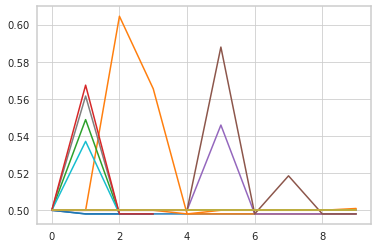

In [6]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")

# BrNet_CF_free

In [7]:
c = CI.confounder()
model = Models.Br_Net_CF_free(alpha=None)
search_space["model"] = model
search_space["wandb"]["group"] = "BrNet CF free"

c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

2022-07-15 12:29:56,823	INFO registry.py:91 -- Detected unknown callable for trainable. Converting to class.
2022-07-15 12:29:59,819	WARNING worker.py:1404 -- Warning: The actor ImplicitFunc is very large (16 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
(ImplicitFunc pid=4051579) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


== Status ==
Current time: 2022-07-15 12:30:06 (running for 00:00:09.14)
Memory usage on this node: 17.3/30.5 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 4.000: None | Iter 1.000: None
Resources requested: 1.0/16 CPUs, 0/0 GPUs, 0.0/10.18 GiB heap, 0.0/5.09 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_12-29-57
Number of trials: 17/20 (16 PENDING, 1 RUNNING)
+------------------------+----------+------------------------+----------+--------------+-----------+----------------+
| Trial name             | status   | loc                    |    alpha |   batch_size |        lr |   weight_decay |
|------------------------+----------+------------------------+----------+--------------+-----------+----------------|
| train_tune_12988_00000 | RUNNING  | 192.168.178.26:4051579 | 0.281227 |          128 | 0.0441387 |     0.00277457 |
| train_tune_12988_00001 | PENDING  |                        | 0.451867 |          256 | 0.0012546 |     2.1175e-05 |
+-----------

(ImplicitFunc pid=4051579) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4051579) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-57/train_tune_12988_00000_0_alpha=0.2812,batch_size=128,lr=0.0441,weight_decay=0.0028_2022-07-15_12-29-59/wandb/run-20220715_123003-12988_00000
(ImplicitFunc pid=4051579) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4051579) wandb: Syncing run train_tune_12988_00000
(ImplicitFunc pid=4051579) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4051579) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/12988_00000


Result for train_tune_12988_00000:
  date: 2022-07-15_12-30-06
  done: false
  experiment_id: 199f799283094070980b1f796de6df1c
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4051579
  time_since_restore: 0.1806952953338623
  time_this_iter_s: 0.1806952953338623
  time_total_s: 0.1806952953338623
  timestamp: 1657881006
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '12988_00000'
  warmup_time: 3.6374330520629883
  
Result for train_tune_12988_00000:
  date: 2022-07-15_12-30-11
  done: true
  experiment_id: 199f799283094070980b1f796de6df1c
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4051579
  time_since_restore: 5.095843076705933
  time_this_iter_s: 0.3353912830352783
  time_total_s: 5.095843076705933
  timestamp: 1657881011
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: '12988_00000'
  warmup_time: 3.6374330520629883
  

(ImplicitFunc pid=4051664) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4051662) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4051666) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4051668) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4051674) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


Result for train_tune_12988_00016:
  date: 2022-07-15_12-30-15
  done: true
  experiment_id: 199f799283094070980b1f796de6df1c
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051579
  time_since_restore: 3.8325493335723877
  time_this_iter_s: 0.2669830322265625
  time_total_s: 3.8325493335723877
  timestamp: 1657881015
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: '12988_00016'
  warmup_time: 3.6374330520629883
  


(ImplicitFunc pid=4051670) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4051672) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


Result for train_tune_12988_00017:
  date: 2022-07-15_12-30-15
  done: true
  experiment_id: 199f799283094070980b1f796de6df1c
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4051579
  time_since_restore: 0.19138860702514648
  time_this_iter_s: 0.19138860702514648
  time_total_s: 0.19138860702514648
  timestamp: 1657881015
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '12988_00017'
  warmup_time: 3.6374330520629883
  
Result for train_tune_12988_00018:
  date: 2022-07-15_12-30-15
  done: false
  experiment_id: 199f799283094070980b1f796de6df1c
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051579
  time_since_restore: 0.15468931198120117
  time_this_iter_s: 0.15468931198120117
  time_total_s: 0.15468931198120117
  timestamp: 1657881015
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '12988_00018'
  warmup_time: 3.6374330520629883
  


(ImplicitFunc pid=4051684) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4051678) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4051680) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4051676) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4051686) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4051687) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4051681) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4051691) wandb: Currently logg

Result for train_tune_12988_00018:
  date: 2022-07-15_12-30-17
  done: true
  experiment_id: 199f799283094070980b1f796de6df1c
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051579
  time_since_restore: 2.095287561416626
  time_this_iter_s: 0.2873880863189697
  time_total_s: 2.095287561416626
  timestamp: 1657881017
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: '12988_00018'
  warmup_time: 3.6374330520629883
  
Result for train_tune_12988_00019:
  date: 2022-07-15_12-30-17
  done: true
  experiment_id: 199f799283094070980b1f796de6df1c
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4051579
  time_since_restore: 0.3101367950439453
  time_this_iter_s: 0.3101367950439453
  time_total_s: 0.3101367950439453
  timestamp: 1657881017
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '12988_00019'
  warmup_time: 3.6374330520629883
  


(ImplicitFunc pid=4051664) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4051664) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-57/train_tune_12988_00002_2_alpha=0.8288,batch_size=256,lr=0.0454,weight_decay=0.0020_2022-07-15_12-30-06/wandb/run-20220715_123014-12988_00002
(ImplicitFunc pid=4051664) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4051664) wandb: Syncing run train_tune_12988_00002
(ImplicitFunc pid=4051664) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4051664) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/12988_00002


Result for train_tune_12988_00002:
  date: 2022-07-15_12-30-21
  done: true
  experiment_id: bfd0c628b55a41e2a130da5536bca66a
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4051664
  time_since_restore: 0.36095738410949707
  time_this_iter_s: 0.36095738410949707
  time_total_s: 0.36095738410949707
  timestamp: 1657881021
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '12988_00002'
  warmup_time: 6.493470907211304
  


(ImplicitFunc pid=4051662) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4051662) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-57/train_tune_12988_00001_1_alpha=0.4519,batch_size=256,lr=0.0013,weight_decay=0.0000_2022-07-15_12-30-06/wandb/run-20220715_123014-12988_00001
(ImplicitFunc pid=4051662) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4051662) wandb: Syncing run train_tune_12988_00001
(ImplicitFunc pid=4051662) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4051662) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/12988_00001
(ImplicitFunc pid=4051668) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4051668) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-57/train_tune_12988_00004_4_alpha=0.5425,batch_size=32,lr=0.0000,weight_decay=0.0261_2022-07-15_12-30-06/wandb/run-2

Result for train_tune_12988_00001:
  date: 2022-07-15_12-30-21
  done: false
  experiment_id: 16f335c127814f2980d36b0341673a1a
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051662
  time_since_restore: 0.386516809463501
  time_this_iter_s: 0.386516809463501
  time_total_s: 0.386516809463501
  timestamp: 1657881021
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '12988_00001'
  warmup_time: 6.938822984695435
  
Result for train_tune_12988_00004:
  date: 2022-07-15_12-30-22
  done: false
  experiment_id: 806cf9107e3746ef8f8f6645e6a13635
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051668
  time_since_restore: 0.6430587768554688
  time_this_iter_s: 0.6430587768554688
  time_total_s: 0.6430587768554688
  timestamp: 1657881022
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '12988_00004'
  warmup_time: 6.975850343704224
  
Result for train_tu

(ImplicitFunc pid=4051670) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4051670) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-57/train_tune_12988_00005_5_alpha=0.5193,batch_size=64,lr=0.0382,weight_decay=0.0008_2022-07-15_12-30-06/wandb/run-20220715_123015-12988_00005
(ImplicitFunc pid=4051670) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4051670) wandb: Syncing run train_tune_12988_00005
(ImplicitFunc pid=4051670) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4051670) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/12988_00005


Result for train_tune_12988_00005:
  date: 2022-07-15_12-30-22
  done: true
  experiment_id: b598fcd6fe7243439c929fa97fd5ca72
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4051670
  time_since_restore: 0.5027000904083252
  time_this_iter_s: 0.5027000904083252
  time_total_s: 0.5027000904083252
  timestamp: 1657881022
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '12988_00005'
  warmup_time: 7.453822374343872
  


(ImplicitFunc pid=4051684) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4051684) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-57/train_tune_12988_00012_12_alpha=0.3260,batch_size=32,lr=0.0001,weight_decay=0.0916_2022-07-15_12-30-07/wandb/run-20220715_123015-12988_00012
(ImplicitFunc pid=4051684) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4051684) wandb: Syncing run train_tune_12988_00012
(ImplicitFunc pid=4051684) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4051684) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/12988_00012
(ImplicitFunc pid=4051678) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4051678) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-57/train_tune_12988_00009_9_alpha=0.8239,batch_size=128,lr=0.0010,weight_decay=0.0026_2022-07-15_12-30-06/wandb/run-

Result for train_tune_12988_00001:
  date: 2022-07-15_12-30-22
  done: true
  experiment_id: 16f335c127814f2980d36b0341673a1a
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4051662
  time_since_restore: 1.7523598670959473
  time_this_iter_s: 0.43926239013671875
  time_total_s: 1.7523598670959473
  timestamp: 1657881022
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: '12988_00001'
  warmup_time: 6.938822984695435
  


(ImplicitFunc pid=4051680) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4051680) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-57/train_tune_12988_00010_10_alpha=0.0854,batch_size=32,lr=0.0007,weight_decay=0.0000_2022-07-15_12-30-07/wandb/run-20220715_123015-12988_00010
(ImplicitFunc pid=4051680) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4051680) wandb: Syncing run train_tune_12988_00010
(ImplicitFunc pid=4051680) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4051680) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/12988_00010
(ImplicitFunc pid=4051676) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4051676) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-57/train_tune_12988_00008_8_alpha=0.5512,batch_size=128,lr=0.0001,weight_decay=0.0001_2022-07-15_12-30-06/wandb/run-

Result for train_tune_12988_00009:
  date: 2022-07-15_12-30-23
  done: false
  experiment_id: 007c9845cba24d56ad9c687af75043ef
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051678
  time_since_restore: 0.5399019718170166
  time_this_iter_s: 0.5399019718170166
  time_total_s: 0.5399019718170166
  timestamp: 1657881023
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '12988_00009'
  warmup_time: 7.874925851821899
  
Result for train_tune_12988_00012:
  date: 2022-07-15_12-30-23
  done: false
  experiment_id: 82614ff7eaff4dd7a44c10a6d67f0e6c
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051684
  time_since_restore: 0.7697327136993408
  time_this_iter_s: 0.7697327136993408
  time_total_s: 0.7697327136993408
  timestamp: 1657881023
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '12988_00012'
  warmup_time: 7.79229474067688
  


(ImplicitFunc pid=4051687) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4051687) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-57/train_tune_12988_00014_14_alpha=0.5487,batch_size=32,lr=0.0002,weight_decay=0.0030_2022-07-15_12-30-07/wandb/run-20220715_123016-12988_00014
(ImplicitFunc pid=4051687) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4051687) wandb: Syncing run train_tune_12988_00014
(ImplicitFunc pid=4051687) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4051687) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/12988_00014
(ImplicitFunc pid=4051681) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4051681) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-57/train_tune_12988_00011_11_alpha=0.8131,batch_size=256,lr=0.0008,weight_decay=0.0101_2022-07-15_12-30-07/wandb/run

Result for train_tune_12988_00007:
  date: 2022-07-15_12-30-23
  done: true
  experiment_id: 57fec07584a94e04a90880f864376ed8
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4051674
  time_since_restore: 2.085765838623047
  time_this_iter_s: 0.5316779613494873
  time_total_s: 2.085765838623047
  timestamp: 1657881023
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: '12988_00007'
  warmup_time: 7.205613136291504
  
Result for train_tune_12988_00008:
  date: 2022-07-15_12-30-23
  done: false
  experiment_id: 0016f11ca00c429293fb8d44d90d4d4b
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051676
  time_since_restore: 0.5400493144989014
  time_this_iter_s: 0.5400493144989014
  time_total_s: 0.5400493144989014
  timestamp: 1657881023
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '12988_00008'
  warmup_time: 8.193194389343262
  


(ImplicitFunc pid=4051691) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4051691) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-29-57/train_tune_12988_00015_15_alpha=0.5141,batch_size=128,lr=0.0004,weight_decay=0.0000_2022-07-15_12-30-07/wandb/run-20220715_123016-12988_00015
(ImplicitFunc pid=4051691) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4051691) wandb: Syncing run train_tune_12988_00015
(ImplicitFunc pid=4051691) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4051691) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/12988_00015


Result for train_tune_12988_00010:
  date: 2022-07-15_12-30-23
  done: false
  experiment_id: 1d1f82a0d2cb48dd91c34874f5d383f6
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051680
  time_since_restore: 0.7230401039123535
  time_this_iter_s: 0.7230401039123535
  time_total_s: 0.7230401039123535
  timestamp: 1657881023
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '12988_00010'
  warmup_time: 8.325911045074463
  
Result for train_tune_12988_00013:
  date: 2022-07-15_12-30-23
  done: false
  experiment_id: 420b95b296da4841be4860fb7cf66c6c
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051686
  time_since_restore: 0.7544221878051758
  time_this_iter_s: 0.7544221878051758
  time_total_s: 0.7544221878051758
  timestamp: 1657881023
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: '12988_00013'
  warmup_time: 8.184728860855103
  
Result for train

(train_tune pid=4051670) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4051670) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4051662) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4051662) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4051662) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: | 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4051662) wandb: | 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4051662) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051662) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051662) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051674) wandb: Waiting for W&B process to finish... (success).
(train_tune p

Result for train_tune_12988_00003:
  date: 2022-07-15_12-30-26
  done: true
  experiment_id: 9011254cb0374e7d96d6ae57b058233d
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051666
  time_since_restore: 4.673372268676758
  time_this_iter_s: 0.4398837089538574
  time_total_s: 4.673372268676758
  timestamp: 1657881026
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: '12988_00003'
  warmup_time: 7.191464900970459
  
Result for train_tune_12988_00006:
  date: 2022-07-15_12-30-26
  done: true
  experiment_id: 276553dd36744ae5adb4d431e76b732a
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051672
  time_since_restore: 4.659386157989502
  time_this_iter_s: 0.41596198081970215
  time_total_s: 4.659386157989502
  timestamp: 1657881026
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: '12988_00006'
  warmup_time: 7.114925861358643
  
Result for train_

(train_tune pid=4051662) wandb: \ 0.003 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051662) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_12988_00010:
  date: 2022-07-15_12-30-26
  done: true
  experiment_id: 1d1f82a0d2cb48dd91c34874f5d383f6
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4051680
  time_since_restore: 3.374846935272217
  time_this_iter_s: 0.5718519687652588
  time_total_s: 3.374846935272217
  timestamp: 1657881026
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: '12988_00010'
  warmup_time: 8.325911045074463
  


(train_tune pid=4051662) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051662) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051674) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051662) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051674) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051674) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051662) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051674) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(tra

Result for train_tune_12988_00009:
  date: 2022-07-15_12-30-27
  done: true
  experiment_id: 007c9845cba24d56ad9c687af75043ef
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4051678
  time_since_restore: 4.472545862197876
  time_this_iter_s: 0.3028285503387451
  time_total_s: 4.472545862197876
  timestamp: 1657881027
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: '12988_00009'
  warmup_time: 7.874925851821899
  
Result for train_tune_12988_00004:
  date: 2022-07-15_12-30-27
  done: false
  experiment_id: 806cf9107e3746ef8f8f6645e6a13635
  hostname: fedora
  iterations_since_restore: 9
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051668
  time_since_restore: 5.887289524078369
  time_this_iter_s: 0.46550726890563965
  time_total_s: 5.887289524078369
  timestamp: 1657881027
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: '12988_00004'
  warmup_time: 6.975850343704224
  
Result for

(train_tune pid=4051674) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051674) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_12988_00008:
  date: 2022-07-15_12-30-27
  done: true
  experiment_id: 0016f11ca00c429293fb8d44d90d4d4b
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051676
  time_since_restore: 4.334231376647949
  time_this_iter_s: 0.24361109733581543
  time_total_s: 4.334231376647949
  timestamp: 1657881027
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: '12988_00008'
  warmup_time: 8.193194389343262
  
Result for train_tune_12988_00004:
  date: 2022-07-15_12-30-27
  done: true
  experiment_id: 806cf9107e3746ef8f8f6645e6a13635
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051668
  time_since_restore: 6.248157262802124
  time_this_iter_s: 0.3608677387237549
  time_total_s: 6.248157262802124
  timestamp: 1657881027
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: '12988_00004'
  warmup_time: 6.975850343704224
  


(train_tune pid=4051674) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051674) wandb: | 0.004 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051662) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051674) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051674) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_12988_00015:
  date: 2022-07-15_12-30-27
  done: true
  experiment_id: 6d6e03b3816d4c31828f568f9b3bd49a
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5908203125
  node_ip: 192.168.178.26
  pid: 4051691
  time_since_restore: 4.1673877239227295
  time_this_iter_s: 0.16867733001708984
  time_total_s: 4.1673877239227295
  timestamp: 1657881027
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: '12988_00015'
  warmup_time: 8.525098323822021
  
Result for train_tune_12988_00012:
  date: 2022-07-15_12-30-28
  done: true
  experiment_id: 82614ff7eaff4dd7a44c10a6d67f0e6c
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4051684
  time_since_restore: 5.366129398345947
  time_this_iter_s: 0.23105311393737793
  time_total_s: 5.366129398345947
  timestamp: 1657881028
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: '12988_00012'
  warmup_time: 7.79229474067688
  


(train_tune pid=4051674) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051674) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051674) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051670) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051674) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_12988_00014:
  date: 2022-07-15_12-30-28
  done: true
  experiment_id: a20be1140f9f4854a24da48a1ec9f751
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4051687
  time_since_restore: 4.86772894859314
  time_this_iter_s: 0.18085575103759766
  time_total_s: 4.86772894859314
  timestamp: 1657881028
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: '12988_00014'
  warmup_time: 8.203394889831543
  
== Status ==
Current time: 2022-07-15 12:30:28 (running for 00:00:31.42)
Memory usage on this node: 21.3/30.5 GiB
Using AsyncHyperBand: num_stopped=20
Bracket: Iter 4.000: 0.5 | Iter 1.000: 0.5
Resources requested: 0/16 CPUs, 0/0 GPUs, 0.0/10.18 GiB heap, 0.0/5.09 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_12-29-57
Number of trials: 20/20 (20 TERMINATED)
+------------------------+------------+------------------------+-----------+--------------+-------------+----------

(train_tune pid=4051666) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4051666) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4051674) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4051672) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4051672) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4051680) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4051680) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4051686) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4051686) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
wandb:                                                                                 deduped)
wandb:                                                                                 deduped)
(train_tune pid=4051666) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB

{'model': Br_Net_CF_free(
   (linear_relu_stack): Sequential(
     (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
     (1): Tanh()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
     (4): Tanh()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
     (7): Tanh()
     (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (9): Flatten(start_dim=1, end_dim=-1)
   )
   (class_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
   (domain_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
 ),
 'device': 'cuda',
 'loss_fn': CrossEntropyLoss(),
 'epochs': 500,
 'batch_size': 128,
 'optimizer': torch.optim.adam.Adam,
 'alpha': 0.5141146377958077,
 'lr': 0.00040951516624352394,
 'weight_decay': 2.679

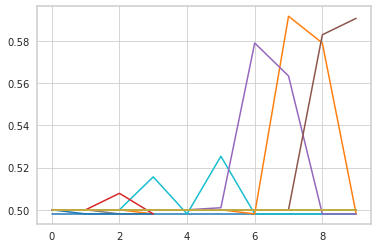

In [8]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")

# BrNet_CF_free_conditioned

In [9]:
c = CI.confounder()
model = Models.Br_Net_CF_free(alpha=None)
search_space["model"] = model
search_space["wandb"]["group"] = "BrNet CF free conditioned"

c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params, conditioning=0)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

2022-07-15 12:30:37,654	INFO registry.py:91 -- Detected unknown callable for trainable. Converting to class.
2022-07-15 12:30:40,635	WARNING worker.py:1404 -- Warning: The actor ImplicitFunc is very large (16 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
(ImplicitFunc pid=4053506) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


== Status ==
Current time: 2022-07-15 12:30:47 (running for 00:00:09.81)
Memory usage on this node: 17.4/30.5 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 4.000: None | Iter 1.000: None
Resources requested: 1.0/16 CPUs, 0/0 GPUs, 0.0/10.18 GiB heap, 0.0/5.09 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_12-30-37
Number of trials: 17/20 (16 PENDING, 1 RUNNING)
+------------------------+----------+------------------------+----------+--------------+-----------+----------------+
| Trial name             | status   | loc                    |    alpha |   batch_size |        lr |   weight_decay |
|------------------------+----------+------------------------+----------+--------------+-----------+----------------|
| train_tune_2aed6_00000 | RUNNING  | 192.168.178.26:4053506 | 0.281227 |          128 | 0.0441387 |     0.00277457 |
| train_tune_2aed6_00001 | PENDING  |                        | 0.451867 |          256 | 0.0012546 |     2.1175e-05 |
+-----------

(ImplicitFunc pid=4053506) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4053506) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-30-37/train_tune_2aed6_00000_0_alpha=0.2812,batch_size=128,lr=0.0441,weight_decay=0.0028_2022-07-15_12-30-40/wandb/run-20220715_123044-2aed6_00000
(ImplicitFunc pid=4053506) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4053506) wandb: Syncing run train_tune_2aed6_00000
(ImplicitFunc pid=4053506) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4053506) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/2aed6_00000


Result for train_tune_2aed6_00000:
  date: 2022-07-15_12-30-47
  done: false
  experiment_id: e28cd178364e442383058175353a474c
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5029296875
  node_ip: 192.168.178.26
  pid: 4053506
  time_since_restore: 0.1735858917236328
  time_this_iter_s: 0.1735858917236328
  time_total_s: 0.1735858917236328
  timestamp: 1657881047
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2aed6_00000
  warmup_time: 4.279599666595459
  
Result for train_tune_2aed6_00000:
  date: 2022-07-15_12-30-52
  done: true
  experiment_id: e28cd178364e442383058175353a474c
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5009765625
  node_ip: 192.168.178.26
  pid: 4053506
  time_since_restore: 4.834001302719116
  time_this_iter_s: 0.33674025535583496
  time_total_s: 4.834001302719116
  timestamp: 1657881052
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2aed6_00000
  warmup_time: 4.279599666595459
  
Re

(ImplicitFunc pid=4053595) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4053605) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4053609) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4053611) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4053614) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4053612) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4053617) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4053621) wandb: Currently logg

Result for train_tune_2aed6_00001:
  date: 2022-07-15_12-31-01
  done: false
  experiment_id: 0aa690c67b4a49b8a0bac36bbb8c80bb
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4053595
  time_since_restore: 0.381436824798584
  time_this_iter_s: 0.381436824798584
  time_total_s: 0.381436824798584
  timestamp: 1657881061
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2aed6_00001
  warmup_time: 5.787675380706787
  
Result for train_tune_2aed6_00001:
  date: 2022-07-15_12-31-02
  done: true
  experiment_id: 0aa690c67b4a49b8a0bac36bbb8c80bb
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.5458984375
  node_ip: 192.168.178.26
  pid: 4053595
  time_since_restore: 1.4330337047576904
  time_this_iter_s: 0.3476138114929199
  time_total_s: 1.4330337047576904
  timestamp: 1657881062
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2aed6_00001
  warmup_time: 5.787675380706787
  


(ImplicitFunc pid=4053605) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4053605) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-30-37/train_tune_2aed6_00002_2_alpha=0.8288,batch_size=256,lr=0.0454,weight_decay=0.0020_2022-07-15_12-30-47/wandb/run-20220715_123056-2aed6_00002
(ImplicitFunc pid=4053605) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4053605) wandb: Syncing run train_tune_2aed6_00002
(ImplicitFunc pid=4053605) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4053605) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/2aed6_00002
(ImplicitFunc pid=4053609) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4053609) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-30-37/train_tune_2aed6_00003_3_alpha=0.6351,batch_size=256,lr=0.0001,weight_decay=0.0040_2022-07-15_12-30-48/wandb/run-

Result for train_tune_2aed6_00002:
  date: 2022-07-15_12-31-03
  done: false
  experiment_id: 2614f976f6e04606a26ac2744e6e85e7
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4053605
  time_since_restore: 0.3981318473815918
  time_this_iter_s: 0.3981318473815918
  time_total_s: 0.3981318473815918
  timestamp: 1657881063
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2aed6_00002
  warmup_time: 7.113164663314819
  


(ImplicitFunc pid=4053621) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4053621) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-30-37/train_tune_2aed6_00009_9_alpha=0.8239,batch_size=128,lr=0.0010,weight_decay=0.0026_2022-07-15_12-30-48/wandb/run-20220715_123056-2aed6_00009
(ImplicitFunc pid=4053621) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4053621) wandb: Syncing run train_tune_2aed6_00009
(ImplicitFunc pid=4053621) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4053621) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/2aed6_00009
(ImplicitFunc pid=4053619) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4053619) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-30-37/train_tune_2aed6_00008_8_alpha=0.5512,batch_size=128,lr=0.0001,weight_decay=0.0001_2022-07-15_12-30-48/wandb/run-

Result for train_tune_2aed6_00003:
  date: 2022-07-15_12-31-03
  done: false
  experiment_id: f5c43e4a247c47e3b82cb7eb1ce47970
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4053609
  time_since_restore: 0.509157657623291
  time_this_iter_s: 0.509157657623291
  time_total_s: 0.509157657623291
  timestamp: 1657881063
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2aed6_00003
  warmup_time: 7.290659189224243
  


(ImplicitFunc pid=4053612) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4053612) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-30-37/train_tune_2aed6_00005_5_alpha=0.5193,batch_size=64,lr=0.0382,weight_decay=0.0008_2022-07-15_12-30-48/wandb/run-20220715_123056-2aed6_00005
(ImplicitFunc pid=4053612) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4053612) wandb: Syncing run train_tune_2aed6_00005
(ImplicitFunc pid=4053612) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4053612) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/2aed6_00005
(ImplicitFunc pid=4053617) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4053617) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-30-37/train_tune_2aed6_00007_7_alpha=0.5286,batch_size=128,lr=0.0015,weight_decay=0.0038_2022-07-15_12-30-48/wandb/run-2

Result for train_tune_2aed6_00006:
  date: 2022-07-15_12-31-03
  done: false
  experiment_id: 8ad2170c27ca48698499e438ddce8986
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4053614
  time_since_restore: 0.5744223594665527
  time_this_iter_s: 0.5744223594665527
  time_total_s: 0.5744223594665527
  timestamp: 1657881063
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2aed6_00006
  warmup_time: 7.394858121871948
  
Result for train_tune_2aed6_00004:
  date: 2022-07-15_12-31-04
  done: false
  experiment_id: f14aba96dadd45df9ac30d79ccb10e0f
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4053611
  time_since_restore: 0.8724241256713867
  time_this_iter_s: 0.8724241256713867
  time_total_s: 0.8724241256713867
  timestamp: 1657881064
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2aed6_00004
  warmup_time: 7.321468353271484
  
Result for train_tun

(ImplicitFunc pid=4053623) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4053623) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-30-37/train_tune_2aed6_00010_10_alpha=0.0854,batch_size=32,lr=0.0007,weight_decay=0.0000_2022-07-15_12-30-48/wandb/run-20220715_123057-2aed6_00010
(ImplicitFunc pid=4053623) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4053623) wandb: Syncing run train_tune_2aed6_00010
(ImplicitFunc pid=4053623) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4053623) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/2aed6_00010
(ImplicitFunc pid=4053629) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4053629) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-30-37/train_tune_2aed6_00013_13_alpha=0.3853,batch_size=32,lr=0.0005,weight_decay=0.0003_2022-07-15_12-30-48/wandb/run-

Result for train_tune_2aed6_00008:
  date: 2022-07-15_12-31-04
  done: false
  experiment_id: 5dc92ed05df94932b43342672c877fc8
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4053619
  time_since_restore: 0.7522368431091309
  time_this_iter_s: 0.7522368431091309
  time_total_s: 0.7522368431091309
  timestamp: 1657881064
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2aed6_00008
  warmup_time: 7.446593523025513
  


(ImplicitFunc pid=4053627) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4053627) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-30-37/train_tune_2aed6_00012_12_alpha=0.3260,batch_size=32,lr=0.0001,weight_decay=0.0916_2022-07-15_12-30-48/wandb/run-20220715_123057-2aed6_00012
(ImplicitFunc pid=4053627) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4053627) wandb: Syncing run train_tune_2aed6_00012
(ImplicitFunc pid=4053627) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4053627) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/2aed6_00012
(ImplicitFunc pid=4053625) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4053625) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-30-37/train_tune_2aed6_00011_11_alpha=0.8131,batch_size=256,lr=0.0008,weight_decay=0.0101_2022-07-15_12-30-48/wandb/run

Result for train_tune_2aed6_00005:
  date: 2022-07-15_12-31-04
  done: false
  experiment_id: 2e7dc6de1cd94a40b7e6dab17b8b1587
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5439453125
  node_ip: 192.168.178.26
  pid: 4053612
  time_since_restore: 0.9854004383087158
  time_this_iter_s: 0.9854004383087158
  time_total_s: 0.9854004383087158
  timestamp: 1657881064
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2aed6_00005
  warmup_time: 7.71779465675354
  


(train_tune pid=4053595) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4053595) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(ImplicitFunc pid=4053638) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4053638) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-30-37/train_tune_2aed6_00014_14_alpha=0.5487,batch_size=32,lr=0.0002,weight_decay=0.0030_2022-07-15_12-30-49/wandb/run-20220715_123057-2aed6_00014
(ImplicitFunc pid=4053638) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4053638) wandb: Syncing run train_tune_2aed6_00014
(ImplicitFunc pid=4053638) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4053638) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/2aed6_00014
(train_tune pid=4053595) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)


Result for train_tune_2aed6_00002:
  date: 2022-07-15_12-31-05
  done: true
  experiment_id: 2614f976f6e04606a26ac2744e6e85e7
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4053605
  time_since_restore: 2.3474607467651367
  time_this_iter_s: 0.9379856586456299
  time_total_s: 2.3474607467651367
  timestamp: 1657881065
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2aed6_00002
  warmup_time: 7.113164663314819
  
Result for train_tune_2aed6_00012:
  date: 2022-07-15_12-31-05
  done: false
  experiment_id: 6c6cd834db1744d69d6d0fed9eecc65c
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4053627
  time_since_restore: 0.8795173168182373
  time_this_iter_s: 0.8795173168182373
  time_total_s: 0.8795173168182373
  timestamp: 1657881065
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 2aed6_00012
  warmup_time: 8.012769937515259
  
Result for train_tune

(train_tune pid=4053595) wandb: | 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4053595) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053595) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053595) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053595) wandb: | 0.003 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_2aed6_00009:
  date: 2022-07-15_12-31-05
  done: true
  experiment_id: a8c1bd9061ed4d839760254209a88836
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4053621
  time_since_restore: 2.530427932739258
  time_this_iter_s: 0.7209682464599609
  time_total_s: 2.530427932739258
  timestamp: 1657881065
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2aed6_00009
  warmup_time: 7.384726524353027
  


(train_tune pid=4053595) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053595) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_2aed6_00007:
  date: 2022-07-15_12-31-06
  done: true
  experiment_id: 1c780b2a86f24595988d02f90c42cd72
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4053617
  time_since_restore: 2.5639188289642334
  time_this_iter_s: 0.6668262481689453
  time_total_s: 2.5639188289642334
  timestamp: 1657881066
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2aed6_00007
  warmup_time: 7.623189687728882
  
Result for train_tune_2aed6_00008:
  date: 2022-07-15_12-31-06
  done: true
  experiment_id: 5dc92ed05df94932b43342672c877fc8
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4053619
  time_since_restore: 2.690199851989746
  time_this_iter_s: 0.7576982975006104
  time_total_s: 2.690199851989746
  timestamp: 1657881066
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2aed6_00008
  warmup_time: 7.446593523025513
  


(train_tune pid=4053595) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053595) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_2aed6_00005:
  date: 2022-07-15_12-31-06
  done: true
  experiment_id: 2e7dc6de1cd94a40b7e6dab17b8b1587
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4053612
  time_since_restore: 2.924180507659912
  time_this_iter_s: 0.460252046585083
  time_total_s: 2.924180507659912
  timestamp: 1657881066
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2aed6_00005
  warmup_time: 7.71779465675354
  


wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)f 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053595) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053595) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053595) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053595) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053595) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053605) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4053605) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)


Result for train_tune_2aed6_00010:
  date: 2022-07-15_12-31-07
  done: true
  experiment_id: ee3c641706534cc2baf100391eab86ac
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4053623
  time_since_restore: 3.1198890209198
  time_this_iter_s: 0.528843879699707
  time_total_s: 3.1198890209198
  timestamp: 1657881067
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2aed6_00010
  warmup_time: 7.938871145248413
  
Result for train_tune_2aed6_00013:
  date: 2022-07-15_12-31-07
  done: true
  experiment_id: ac5e2c141f08449a892ea601e68b2133
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4053629
  time_since_restore: 3.0878982543945312
  time_this_iter_s: 0.4901731014251709
  time_total_s: 3.0878982543945312
  timestamp: 1657881067
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 2aed6_00013
  warmup_time: 7.88982367515564
  


(train_tune pid=4053595) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053614) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4053614) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4053605) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4053609) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4053609) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4053605) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053605) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_2aed6_00011:
  date: 2022-07-15_12-31-08
  done: true
  experiment_id: 2814dd9f7e9147f982777ff172da3dff
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5029296875
  node_ip: 192.168.178.26
  pid: 4053625
  time_since_restore: 3.8193464279174805
  time_this_iter_s: 0.2352278232574463
  time_total_s: 3.8193464279174805
  timestamp: 1657881068
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2aed6_00011
  warmup_time: 8.061378955841064
  
Result for train_tune_2aed6_00015:
  date: 2022-07-15_12-31-08
  done: true
  experiment_id: fb197cdae41744bdb10a202d0e437118
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4053643
  time_since_restore: 3.9767520427703857
  time_this_iter_s: 0.2041633129119873
  time_total_s: 3.9767520427703857
  timestamp: 1657881068
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2aed6_00015
  warmup_time: 7.9908857345581055
  


(train_tune pid=4053605) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)f 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053621) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4053621) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4053605) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053609) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4053614) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4053619) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4053619) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4053605) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053617) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4053617) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)


Result for train_tune_2aed6_00004:
  date: 2022-07-15_12-31-08
  done: true
  experiment_id: f14aba96dadd45df9ac30d79ccb10e0f
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4053611
  time_since_restore: 5.671200752258301
  time_this_iter_s: 0.25262880325317383
  time_total_s: 5.671200752258301
  timestamp: 1657881068
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2aed6_00004
  warmup_time: 7.321468353271484
  


(train_tune pid=4053605) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053605) wandb: | 0.008 MB of 0.013 MB uploaded (0.000 MB deduped)
wandb:                                                                                 deduped)
(train_tune pid=4053605) wandb: / 0.011 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053605) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053609) wandb: | 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4053612) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4053612) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4053621) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)


Result for train_tune_2aed6_00012:
  date: 2022-07-15_12-31-09
  done: true
  experiment_id: 6c6cd834db1744d69d6d0fed9eecc65c
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4053627
  time_since_restore: 4.674715042114258
  time_this_iter_s: 0.20755457878112793
  time_total_s: 4.674715042114258
  timestamp: 1657881069
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2aed6_00012
  warmup_time: 8.012769937515259
  
Result for train_tune_2aed6_00014:
  date: 2022-07-15_12-31-09
  done: true
  experiment_id: 14619716cedd4815a57eb7b54ae415f9
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4053638
  time_since_restore: 4.42902684211731
  time_this_iter_s: 0.21406817436218262
  time_total_s: 4.42902684211731
  timestamp: 1657881069
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 2aed6_00014
  warmup_time: 8.17731499671936
  


(train_tune pid=4053605) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053609) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053619) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4053605) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053609) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053617) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)


== Status ==
Current time: 2022-07-15 12:31:09 (running for 00:00:31.47)
Memory usage on this node: 21.4/30.5 GiB
Using AsyncHyperBand: num_stopped=20
Bracket: Iter 4.000: 0.5 | Iter 1.000: 0.5
Resources requested: 0/16 CPUs, 0/0 GPUs, 0.0/10.18 GiB heap, 0.0/5.09 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_12-30-37
Number of trials: 20/20 (20 TERMINATED)
+------------------------+------------+------------------------+-----------+--------------+-------------+----------------+----------+--------+------------------+
| Trial name             | status     | loc                    |     alpha |   batch_size |          lr |   weight_decay |      acc |   iter |   total time (s) |
|------------------------+------------+------------------------+-----------+--------------+-------------+----------------+----------+--------+------------------|
| train_tune_2aed6_00000 | TERMINATED | 192.168.178.26:4053506 | 0.281227  |          128 | 0.0441387   |    0.00277457  | 0.50

(train_tune pid=4053605) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053609) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053614) wandb: | 0.001 MB of 0.003 MB uploaded (0.000 MB deduped)
(train_tune pid=4053605) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053609) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053614) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053605) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053609) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053612) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4053614) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4053621) wandb: | 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4053623) wandb: Waiting for W&B process to finish... (success).
(train_

{'model': Br_Net_CF_free(
   (linear_relu_stack): Sequential(
     (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
     (1): Tanh()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
     (4): Tanh()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
     (7): Tanh()
     (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (9): Flatten(start_dim=1, end_dim=-1)
   )
   (class_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
   (domain_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
 ),
 'device': 'cuda',
 'loss_fn': CrossEntropyLoss(),
 'epochs': 500,
 'batch_size': 64,
 'optimizer': torch.optim.adam.Adam,
 'alpha': 0.5193123361468044,
 'lr': 0.038205822667045815,
 'weight_decay': 0.000777

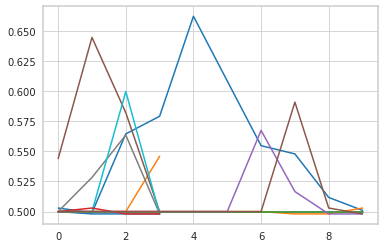

In [10]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")
#analysis.best_dataframe(metric="mean_accuracy", mode="max", scope="last-10-avg").plot()

# BrNet_DANN

In [11]:
c = CI.confounder()
model = Models.Br_Net_DANN(alpha=None)
search_space["model"] = model
search_space["wandb"]["group"] = "BrNet DANN"

c.generate_data(mode="br_net", samples=512, overlap=0, target_domain_samples=target_domain_samples, target_domain_confounding=1, train_confounding=1, test_confounding=[1], de_correlate_confounder_target=True, de_correlate_confounder_test=True, params=params)

reporter = CLIReporter(max_progress_rows=1, max_report_frequency=120)
analysis = tune.run(c.train_tune,num_samples=samples, progress_reporter=reporter, config=search_space, scheduler=ASHAScheduler(metric="mean_accuracy", mode="max", max_t=max_t))

2022-07-15 12:31:18,238	INFO registry.py:91 -- Detected unknown callable for trainable. Converting to class.
2022-07-15 12:31:21,185	WARNING worker.py:1404 -- Warning: The actor ImplicitFunc is very large (16 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
(ImplicitFunc pid=4055481) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


== Status ==
Current time: 2022-07-15 12:31:27 (running for 00:00:09.14)
Memory usage on this node: 17.4/30.5 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 4.000: None | Iter 1.000: None
Resources requested: 1.0/16 CPUs, 0/0 GPUs, 0.0/10.18 GiB heap, 0.0/5.09 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_12-31-18
Number of trials: 17/20 (16 PENDING, 1 RUNNING)
+------------------------+----------+------------------------+----------+--------------+-----------+----------------+
| Trial name             | status   | loc                    |    alpha |   batch_size |        lr |   weight_decay |
|------------------------+----------+------------------------+----------+--------------+-----------+----------------|
| train_tune_431d5_00000 | RUNNING  | 192.168.178.26:4055481 | 0.281227 |          128 | 0.0441387 |     0.00277457 |
| train_tune_431d5_00001 | PENDING  |                        | 0.451867 |          256 | 0.0012546 |     2.1175e-05 |
+-----------

(ImplicitFunc pid=4055481) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4055481) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-31-18/train_tune_431d5_00000_0_alpha=0.2812,batch_size=128,lr=0.0441,weight_decay=0.0028_2022-07-15_12-31-20/wandb/run-20220715_123124-431d5_00000
(ImplicitFunc pid=4055481) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4055481) wandb: Syncing run train_tune_431d5_00000
(ImplicitFunc pid=4055481) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4055481) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/431d5_00000


Result for train_tune_431d5_00000:
  date: 2022-07-15_12-31-27
  done: false
  experiment_id: 7286ba063466418c958bdd10664c8f5e
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055481
  time_since_restore: 0.2455892562866211
  time_this_iter_s: 0.2455892562866211
  time_total_s: 0.2455892562866211
  timestamp: 1657881087
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 431d5_00000
  warmup_time: 3.6735117435455322
  
Result for train_tune_431d5_00000:
  date: 2022-07-15_12-31-32
  done: true
  experiment_id: 7286ba063466418c958bdd10664c8f5e
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055481
  time_since_restore: 4.866132020950317
  time_this_iter_s: 0.37089109420776367
  time_total_s: 4.866132020950317
  timestamp: 1657881092
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 431d5_00000
  warmup_time: 3.6735117435455322
  
Result for train_t

(ImplicitFunc pid=4055602) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4055604) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


Result for train_tune_431d5_00016:
  date: 2022-07-15_12-31-36
  done: true
  experiment_id: 7286ba063466418c958bdd10664c8f5e
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055481
  time_since_restore: 4.088660955429077
  time_this_iter_s: 0.24455666542053223
  time_total_s: 4.088660955429077
  timestamp: 1657881096
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 431d5_00016
  warmup_time: 3.6735117435455322
  


(ImplicitFunc pid=4055608) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4055606) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4055613) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


Result for train_tune_431d5_00017:
  date: 2022-07-15_12-31-36
  done: false
  experiment_id: 7286ba063466418c958bdd10664c8f5e
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055481
  time_since_restore: 0.24549341201782227
  time_this_iter_s: 0.24549341201782227
  time_total_s: 0.24549341201782227
  timestamp: 1657881096
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 431d5_00017
  warmup_time: 3.6735117435455322
  


(ImplicitFunc pid=4055612) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4055610) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4055616) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


Result for train_tune_431d5_00017:
  date: 2022-07-15_12-31-37
  done: true
  experiment_id: 7286ba063466418c958bdd10664c8f5e
  hostname: fedora
  iterations_since_restore: 4
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4055481
  time_since_restore: 0.7475631237030029
  time_this_iter_s: 0.15138745307922363
  time_total_s: 0.7475631237030029
  timestamp: 1657881097
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 431d5_00017
  warmup_time: 3.6735117435455322
  
Result for train_tune_431d5_00018:
  date: 2022-07-15_12-31-37
  done: false
  experiment_id: 7286ba063466418c958bdd10664c8f5e
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055481
  time_since_restore: 0.14138293266296387
  time_this_iter_s: 0.14138293266296387
  time_total_s: 0.14138293266296387
  timestamp: 1657881097
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 431d5_00018
  warmup_time: 3.6735117435455322
  


(ImplicitFunc pid=4055622) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4055620) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4055630) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4055624) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4055625) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4055627) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin
(ImplicitFunc pid=4055647) wandb: Currently logged in as: raphaelmaser (confounder_in_ml). Use `wandb login --relogin` to force relogin


Result for train_tune_431d5_00018:
  date: 2022-07-15_12-31-39
  done: true
  experiment_id: 7286ba063466418c958bdd10664c8f5e
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055481
  time_since_restore: 1.9563663005828857
  time_this_iter_s: 0.3004744052886963
  time_total_s: 1.9563663005828857
  timestamp: 1657881099
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 431d5_00018
  warmup_time: 3.6735117435455322
  
Result for train_tune_431d5_00019:
  date: 2022-07-15_12-31-39
  done: false
  experiment_id: 7286ba063466418c958bdd10664c8f5e
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055481
  time_since_restore: 0.42236828804016113
  time_this_iter_s: 0.42236828804016113
  time_total_s: 0.42236828804016113
  timestamp: 1657881099
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 431d5_00019
  warmup_time: 3.6735117435455322
  
Result for tra

(ImplicitFunc pid=4055602) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4055602) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-31-18/train_tune_431d5_00001_1_alpha=0.4519,batch_size=256,lr=0.0013,weight_decay=0.0000_2022-07-15_12-31-27/wandb/run-20220715_123136-431d5_00001
(ImplicitFunc pid=4055602) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4055602) wandb: Syncing run train_tune_431d5_00001
(ImplicitFunc pid=4055602) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4055602) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/431d5_00001


Result for train_tune_431d5_00001:
  date: 2022-07-15_12-31-42
  done: false
  experiment_id: 747a8fa34abd4bb89fdce087517d8a84
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055602
  time_since_restore: 0.46867942810058594
  time_this_iter_s: 0.46867942810058594
  time_total_s: 0.46867942810058594
  timestamp: 1657881102
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 431d5_00001
  warmup_time: 6.179598093032837
  


(ImplicitFunc pid=4055604) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4055604) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-31-18/train_tune_431d5_00002_2_alpha=0.8288,batch_size=256,lr=0.0454,weight_decay=0.0020_2022-07-15_12-31-27/wandb/run-20220715_123136-431d5_00002
(ImplicitFunc pid=4055604) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4055604) wandb: Syncing run train_tune_431d5_00002
(ImplicitFunc pid=4055604) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4055604) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/431d5_00002


Result for train_tune_431d5_00002:
  date: 2022-07-15_12-31-42
  done: false
  experiment_id: bfc2b1545623487f80c444aa056c36ba
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055604
  time_since_restore: 0.3776082992553711
  time_this_iter_s: 0.3776082992553711
  time_total_s: 0.3776082992553711
  timestamp: 1657881102
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 431d5_00002
  warmup_time: 6.948328018188477
  


(ImplicitFunc pid=4055608) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4055608) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-31-18/train_tune_431d5_00004_4_alpha=0.5425,batch_size=32,lr=0.0000,weight_decay=0.0261_2022-07-15_12-31-28/wandb/run-20220715_123136-431d5_00004
(ImplicitFunc pid=4055608) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4055608) wandb: Syncing run train_tune_431d5_00004
(ImplicitFunc pid=4055608) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4055608) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/431d5_00004
(ImplicitFunc pid=4055613) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4055613) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-31-18/train_tune_431d5_00007_7_alpha=0.5286,batch_size=128,lr=0.0015,weight_decay=0.0038_2022-07-15_12-31-28/wandb/run-2

Result for train_tune_431d5_00004:
  date: 2022-07-15_12-31-43
  done: false
  experiment_id: 9d9c5c65703a47fcbb7d6aa260783613
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055608
  time_since_restore: 0.6190314292907715
  time_this_iter_s: 0.6190314292907715
  time_total_s: 0.6190314292907715
  timestamp: 1657881103
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 431d5_00004
  warmup_time: 7.209081172943115
  


(ImplicitFunc pid=4055610) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4055610) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-31-18/train_tune_431d5_00005_5_alpha=0.5193,batch_size=64,lr=0.0382,weight_decay=0.0008_2022-07-15_12-31-28/wandb/run-20220715_123137-431d5_00005
(ImplicitFunc pid=4055610) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4055610) wandb: Syncing run train_tune_431d5_00005
(ImplicitFunc pid=4055610) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4055610) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/431d5_00005
(ImplicitFunc pid=4055616) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4055616) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-31-18/train_tune_431d5_00008_8_alpha=0.5512,batch_size=128,lr=0.0001,weight_decay=0.0001_2022-07-15_12-31-28/wandb/run-2

Result for train_tune_431d5_00007:
  date: 2022-07-15_12-31-44
  done: false
  experiment_id: 6f235054b8934208a3c2c1be81b07d57
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055613
  time_since_restore: 0.5185365676879883
  time_this_iter_s: 0.5185365676879883
  time_total_s: 0.5185365676879883
  timestamp: 1657881104
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 431d5_00007
  warmup_time: 7.651896715164185
  
Result for train_tune_431d5_00003:
  date: 2022-07-15_12-31-44
  done: false
  experiment_id: bef2bfad8b564e598c95b9be26d42dd7
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055606
  time_since_restore: 0.5708632469177246
  time_this_iter_s: 0.5708632469177246
  time_total_s: 0.5708632469177246
  timestamp: 1657881104
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 431d5_00003
  warmup_time: 7.815515995025635
  
Result for train_tun

(ImplicitFunc pid=4055622) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4055622) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-31-18/train_tune_431d5_00010_10_alpha=0.0854,batch_size=32,lr=0.0007,weight_decay=0.0000_2022-07-15_12-31-28/wandb/run-20220715_123137-431d5_00010
(ImplicitFunc pid=4055622) wandb: Run `wandb offline` to turn off syncing.
(ImplicitFunc pid=4055622) wandb: Syncing run train_tune_431d5_00010
(ImplicitFunc pid=4055622) wandb: ⭐️ View project at https://wandb.ai/confounder_in_ml/Hyperparameters
(ImplicitFunc pid=4055622) wandb: 🚀 View run at https://wandb.ai/confounder_in_ml/Hyperparameters/runs/431d5_00010
(ImplicitFunc pid=4055620) wandb: Tracking run with wandb version 0.12.21
(ImplicitFunc pid=4055620) wandb: Run data is saved locally in /home/raffi/ray_results/train_tune_2022-07-15_12-31-18/train_tune_431d5_00009_9_alpha=0.8239,batch_size=128,lr=0.0010,weight_decay=0.0026_2022-07-15_12-31-28/wandb/run-

Result for train_tune_431d5_00008:
  date: 2022-07-15_12-31-45
  done: false
  experiment_id: 18f0d841d2ee419a96b62941a65381a0
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055616
  time_since_restore: 0.9046382904052734
  time_this_iter_s: 0.9046382904052734
  time_total_s: 0.9046382904052734
  timestamp: 1657881105
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 431d5_00008
  warmup_time: 7.932667016983032
  
Result for train_tune_431d5_00011:
  date: 2022-07-15_12-31-45
  done: false
  experiment_id: 4be46876aa0140afa6c73f21a61dfc04
  hostname: fedora
  iterations_since_restore: 1
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055624
  time_since_restore: 0.722510576248169
  time_this_iter_s: 0.722510576248169
  time_total_s: 0.722510576248169
  timestamp: 1657881105
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 431d5_00011
  warmup_time: 7.86490535736084
  
Result for train_tune_43

(train_tune pid=4055602) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4055602) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)


Result for train_tune_431d5_00008:
  date: 2022-07-15_12-31-50
  done: false
  experiment_id: 18f0d841d2ee419a96b62941a65381a0
  hostname: fedora
  iterations_since_restore: 8
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055616
  time_since_restore: 5.906564712524414
  time_this_iter_s: 0.34019947052001953
  time_total_s: 5.906564712524414
  timestamp: 1657881110
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 431d5_00008
  warmup_time: 7.932667016983032
  
Result for train_tune_431d5_00011:
  date: 2022-07-15_12-31-50
  done: true
  experiment_id: 4be46876aa0140afa6c73f21a61dfc04
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055624
  time_since_restore: 5.618861198425293
  time_this_iter_s: 0.2632253170013428
  time_total_s: 5.618861198425293
  timestamp: 1657881110
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 431d5_00011
  warmup_time: 7.86490535736084
  


(train_tune pid=4055602) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)


Result for train_tune_431d5_00004:
  date: 2022-07-15_12-31-50
  done: true
  experiment_id: 9d9c5c65703a47fcbb7d6aa260783613
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055608
  time_since_restore: 7.3052685260772705
  time_this_iter_s: 0.5562252998352051
  time_total_s: 7.3052685260772705
  timestamp: 1657881110
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 431d5_00004
  warmup_time: 7.209081172943115
  
Result for train_tune_431d5_00009:
  date: 2022-07-15_12-31-50
  done: true
  experiment_id: 6ae7622ec3594abaa8df268b5f5d3474
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055620
  time_since_restore: 5.7602715492248535
  time_this_iter_s: 0.3026437759399414
  time_total_s: 5.7602715492248535
  timestamp: 1657881110
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 431d5_00009
  warmup_time: 8.174849033355713
  
Result for train_t

(train_tune pid=4055602) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4055602) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4055602) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_431d5_00014:
  date: 2022-07-15_12-31-51
  done: false
  experiment_id: 62c5797e25574f6dbf7ffeb76e72b059
  hostname: fedora
  iterations_since_restore: 8
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055630
  time_since_restore: 6.271393775939941
  time_this_iter_s: 0.23701953887939453
  time_total_s: 6.271393775939941
  timestamp: 1657881111
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 431d5_00014
  warmup_time: 7.914619207382202
  


(train_tune pid=4055604) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4055604) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4055602) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)


Result for train_tune_431d5_00013:
  date: 2022-07-15_12-31-51
  done: true
  experiment_id: cabe7272426d455cbb84aa8d5fd47560
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.498046875
  node_ip: 192.168.178.26
  pid: 4055627
  time_since_restore: 6.070087194442749
  time_this_iter_s: 0.22881746292114258
  time_total_s: 6.070087194442749
  timestamp: 1657881111
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 431d5_00013
  warmup_time: 8.328034400939941
  
Result for train_tune_431d5_00012:
  date: 2022-07-15_12-31-51
  done: true
  experiment_id: eca1e6ee9b0942e3a3d772b86ee533d1
  hostname: fedora
  iterations_since_restore: 10
  mean_accuracy: 0.5
  node_ip: 192.168.178.26
  pid: 4055625
  time_since_restore: 6.3049445152282715
  time_this_iter_s: 0.19702649116516113
  time_total_s: 6.3049445152282715
  timestamp: 1657881111
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 431d5_00012
  warmup_time: 8.237213373184204
  
Result for

(train_tune pid=4055602) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4055602) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4055602) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4055602) wandb: \ 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4055604) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4055602) wandb: | 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)


== Status ==
Current time: 2022-07-15 12:31:51 (running for 00:00:33.18)
Memory usage on this node: 21.5/30.5 GiB
Using AsyncHyperBand: num_stopped=20
Bracket: Iter 4.000: 0.5 | Iter 1.000: 0.5
Resources requested: 0/16 CPUs, 0/0 GPUs, 0.0/10.18 GiB heap, 0.0/5.09 GiB objects
Result logdir: /home/raffi/ray_results/train_tune_2022-07-15_12-31-18
Number of trials: 20/20 (20 TERMINATED)
+------------------------+------------+------------------------+-----------+--------------+-------------+----------------+----------+--------+------------------+
| Trial name             | status     | loc                    |     alpha |   batch_size |          lr |   weight_decay |      acc |   iter |   total time (s) |
|------------------------+------------+------------------------+-----------+--------------+-------------+----------------+----------+--------+------------------|
| train_tune_431d5_00000 | TERMINATED | 192.168.178.26:4055481 | 0.281227  |          128 | 0.0441387   |    0.00277457  | 0.5 

(train_tune pid=4055602) wandb: / 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4055602) wandb: - 0.013 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4055622) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4055622) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4055604) wandb: | 0.001 MB of 0.010 MB uploaded (0.000 MB deduped)
(train_tune pid=4055604) wandb: / 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4055604) wandb: - 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4055622) wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tune pid=4055612) wandb: Waiting for W&B process to finish... (success).
(train_tune pid=4055604) wandb: \ 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4055622) wandb: | 0.001 MB of 0.013 MB uploaded (0.000 MB deduped)
(train_tune pid=4055612) wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
(train_tun

{'model': Br_Net_DANN(
   (linear_relu_stack): Sequential(
     (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))
     (1): Tanh()
     (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (3): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1))
     (4): Tanh()
     (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (6): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
     (7): Tanh()
     (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (9): Flatten(start_dim=1, end_dim=-1)
   )
   (class_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
   (domain_predictor): Sequential(
     (0): Linear(in_features=32, out_features=2, bias=True)
   )
 ),
 'device': 'cuda',
 'loss_fn': CrossEntropyLoss(),
 'epochs': 500,
 'batch_size': 32,
 'optimizer': torch.optim.adam.Adam,
 'alpha': 0.08543208803110836,
 'lr': 0.0007420826778322299,
 'weight_decay': 2.9270167

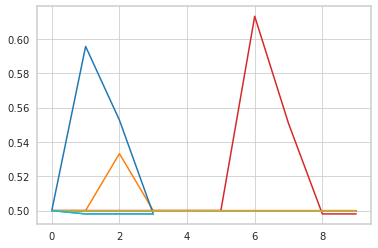

In [12]:
plot_analysis(analysis)
analysis.get_best_config(metric="mean_accuracy", mode="max", scope="last-10-avg")